## Introduction

L'objectif de ce Notebook est de montrer l'intérêt de changer de représentation pour observer un signal. Dans le cas de signaux de dimension finie $N$, il s'agira de représenter le vecteur sur une autre base que la base canonique, notamment la base de Fourier.

#### mots clefs
Fourier, Changement de base, numpy array

## Approximation d'un signal
Le module `numpy` de python permet de définir des données de type `array` pour lesquelles les opérations courantes telles transposition et produit matriciel sont déjà codées. Essayer l'exemple suivant : 


In [1]:
import numpy as np

A = np.array(((1, 2, 1j), (1, 2j, 3)))
print(A,'\n ---- \n',A.T, '\n ---- \n', A.conj().T, '\n ---- \n', A.dot(A.conj().T), '\n ----')
print(A.dtype)
print(A.shape)

[[1.+0.j 2.+0.j 0.+1.j]
 [1.+0.j 0.+2.j 3.+0.j]] 
 ---- 
 [[1.+0.j 1.+0.j]
 [2.+0.j 0.+2.j]
 [0.+1.j 3.+0.j]] 
 ---- 
 [[1.-0.j 1.-0.j]
 [2.-0.j 0.-2.j]
 [0.-1.j 3.-0.j]] 
 ---- 
 [[ 6.+0.j  1.-1.j]
 [ 1.+1.j 14.+0.j]] 
 ----
complex128
(2, 3)


#### Exercice
On considère la matrice $\mathbf{A}=\begin{bmatrix} 
1 & 1 & 0 & 0 \\
1 & -1 & 0 & 0 \\
0 & 0 & 1 & 1 \\
0 & 0 & 1 & -1 
\end{bmatrix}$ et le vecteur $\mathbf{x}=\begin{bmatrix} 
1+\epsilon_1  \\
1  \\
-1  \\
-1-\epsilon_2 
\end{bmatrix}$ avec $\epsilon_1,\,\epsilon_2 \ll 1$.
1. Calculer le vecteur $\mathbf{y}=\mathbf{Ax}$.
2. $1+\epsilon_1,\, 1,\, -1,\, -1-\epsilon_2$ sont par définition les coefficients du vecteur $\mathbf{x}$ dans la base canonique de $\mathbb{C}^4$. Montrer qu'il existe une base $B=\{\mathbf{b_1},\mathbf{b_2},\mathbf{b_3},\mathbf{b_4}\}$ dans laquelle les coefficients du vecteur $\mathbf{x}$ sont les $y_i$. Calculer la matrice $\mathbf{B}=[\mathbf{b_1}\,\mathbf{b_2}\,\mathbf{b_3},\mathbf{b_4}]$.
3. Proposer une approximation *parcimonieuse* de $\mathbf{x}$, notée $\mathbf{P_x}$ qui sera définie par deux coefficients non nuls seulement dans la base $B$. Construire une fonction python `approx` qui renvoie $\mathbf{P_x}$ et prend $(\epsilon_1,\,\epsilon_2)$ en entrée.

In [6]:
import numpy as np
import numpy as np

epsilon1 = 0.01
epsilon2 = 0.0001

A = np.array(((1, 1, 0, 0),(1,-1,0,0),(0,0,1,1),(0,0,1,-1)))
x = np.array(((1+epsilon1),(1),(1),(1+epsilon2)))

y = A.dot(x)
print(y)


[ 2.0100e+00  1.0000e-02  2.0001e+00 -1.0000e-04]


In [8]:
B = np.linalg.inv(A)
print(B)



[[ 0.5  0.5  0.   0. ]
 [ 0.5 -0.5 -0.  -0. ]
 [ 0.   0.   0.5  0.5]
 [-0.  -0.   0.5 -0.5]]
[1.01   1.     1.     1.0001]


In [16]:
def approx(e1,e2):
    x = np.array(((1+e1),(1),(1),(1+e2)))
    y = A.dot(x)
    
    vecteur_trie = sorted(y, key=lambda x: abs(x))

    for i in range(2):
        indice = np.where(y == vecteur_trie[i])[0][0]
        y[indice] = 0
    return(y)

new_x = B.dot(y)
print(new_x)

approx(0.01,0.0001)

4.040099989999999


array([2.01  , 0.    , 2.0001, 0.    ])

   ## Base de Fourier dicrète
   La base de Fourier Discrète sur N points est une base d’ondes pures ou encore sinusoïdes complexes de la forme : $$\mathbf{e}_k(n) = \dfrac{1}{N} \exp(i2\pi\frac{k}{N}n),\: k=0,1,\ldots,N-1.$$
   La décomposition sur cette base d'un signal fini $\mathbf{x}$ donne sa *Transformée de Fourier Discrète*, notée $\mathbf{X}$.

#### Exercice
1. Ecrire une fonction `fourier(k,N)` qui retourne le vecteur colonne `ek` de dimension $N$ pour un $k$ donné.
2. Calculer la matrice $\mathbf{E}=[\mathbf{e}_0,\, \mathbf{e}_1,\, \ldots,\, \mathbf{e}_{N-1}]$. Afficher alors la valeur $\mathbf{E}^H\mathbf{E}$ et en déduire que la base est orthogonale.
3. A l’aide du module `matplotlib` tracer le graphe de $\mathrm{Re}(\mathbf{e}_k(n))$ en fonction de $n$ pour quelques valeurs de k (typ. 0,1,2,3) et $N=64$. Quelle caractéristique commune partagent ces fonctions de $n$ ?
4. Construire une fonction `tfd` qui renvoie dans un vecteur $\mathbf{X}$ les coefficients du vecteur $\mathbf{x}$ dans la base des $\mathbf{e}_k$. Vérifier votre calcul sur un vecteur aléatoire (module `numpy.random`) de dimension $N=8$ à l'aide de la fonction `fft` du module `numpy.fft`. 

#### Application
Construire le signal $x(n)=\cos (2\pi \nu_0 n)+ b(n)$ où $b(n)$ est un bruit blanc gaussien de variance 1, pour $n=0,1,\ldots,N-1$, $N=128$, $\nu_0 = 10/N$. Afficher sur deux graphes disctincts :
* le signal $x(n)$ en fonction de $n$,
* les valeurs $|X(k)|$ en fonction de $k$ et en décibels.

Essayer ensuite avec $\nu_0=0.1$. Pour quelle(s) valeur(s) de $k$, $X(k)$ atteint t-il un maximum global. A quelle valeur de fréquence réduite $\nu$ cela correspond-il ? Commentez ces résultats en terme de précision de la représentation. 

In [37]:
import numpy as np
N=4
def fourier(k, N):
    n = np.arange(N)
    ek = np.exp(1j*2*np.pi*k/N*n)/N
    return ek.reshape(-1, 1)

def fourier_matrix(N):
    return np.array([fourier(k, N) for k in range(N)]).squeeze()
#print(fourier_matrix(4))
E = fourier_matrix(N)

print(E.dot(E.conj().T))


[[ 2.50000000e-01+0.00000000e+00j -1.14810637e-17-1.38777878e-17j
   0.00000000e+00-1.53080850e-17j  2.05654034e-17-2.08166817e-17j]
 [-1.14810637e-17+1.38777878e-17j  2.50000000e-01+0.00000000e+00j
  -1.07659152e-17-8.36919109e-18j  0.00000000e+00-1.53080850e-17j]
 [ 0.00000000e+00+1.53080850e-17j -1.07659152e-17+8.36919109e-18j
   2.50000000e-01+0.00000000e+00j -5.25731843e-18-1.24474906e-17j]
 [ 2.05654034e-17+2.08166817e-17j  0.00000000e+00+1.53080850e-17j
  -5.25731843e-18+1.24474906e-17j  2.50000000e-01+0.00000000e+00j]]


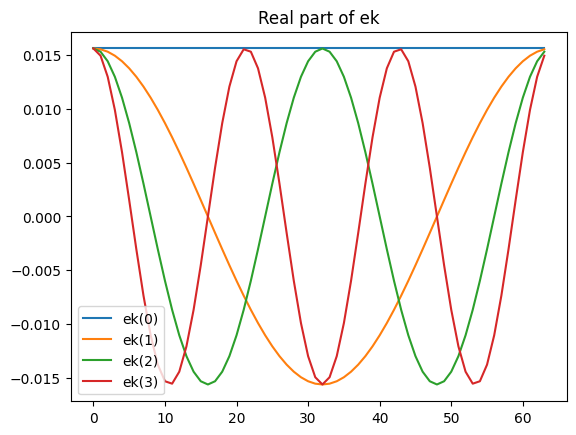

In [48]:
import matplotlib.pyplot as plt

N=64
n=np.arange(N)

def ek(k):
    return np.exp(1j*2*np.pi/N*n*k)/N

for i in range(4):
    plt.plot(n, np.real(ek(i)), label='ek({})'.format(i))
plt.title('Real part of ek')
plt.legend()
plt.show()

In [54]:
def tfd(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape(-1, 1)
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

#marche pas mdr

print(tfd(np.array([1, 1, 1, 1])))
print(np.fft.fft(np.array([1, 1, 1, 1])))

[ 4.0000000e+00+0.0000000e+00j -1.2246468e-16-1.2246468e-16j
  0.0000000e+00-2.4492936e-16j  3.6739404e-16-3.6739404e-16j]
[4.+0.j 0.+0.j 0.+0.j 0.+0.j]
